# 1. ASL with CNN

In [1]:
import numpy as np
np.random.seed(5) 
import tensorflow as tf
# tf.set_random_seed(2)
tf.random.set_seed(2)
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2
from sklearn.model_selection import KFold
# AsL
# train_dir = "E:\\ygesh_isl\\ASL-Recognition-CNN-OpenCV\\asl_alphabet_train\\asl_alphabet_train"
# eval_dir = "E:\\ygesh_isl\\ASL-Recognition-CNN-OpenCV\\asl-alphabet-test"
# ISL
train_dir = "E:\\ygesh_isl\\ASL-Recognition-CNN-OpenCV\\TRAIN"
eval_dir = "E:\\ygesh_isl\\ASL-Recognition-CNN-OpenCV\\TEST"


In [2]:
# Define the number of folds for cross-validation
num_folds = 10
tf.__version__

'2.13.0'

# 2. Loading the data


In [3]:
def load_images(directory):
    images = []
    labels = []
    for idx, label in enumerate(uniq_labels):
        for file in os.listdir(directory + "/" + label):
            filepath = directory + "/" + label + "/" + file
            image = cv2.resize(cv2.imread(filepath), (64, 64))
            images.append(image)
            labels.append(idx)
    images = np.array(images)
    labels = np.array(labels)
    return(images, labels)

In [4]:
import keras

uniq_labels = sorted(os.listdir(train_dir))
images, labels = load_images(directory = train_dir)

if uniq_labels == sorted(os.listdir(eval_dir)):
    X_eval, y_eval = load_images(directory = eval_dir)

## 2.1 Train-Test Split

In [7]:
from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size = 0.1, stratify = labels)
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size = 0.25, stratify = labels)

n = len(uniq_labels)
train_n = len(X_train)
test_n = len(X_test)

print("Total number of symbols: ", n)
print("Number of training images: " , train_n)
print("Number of testing images: ", test_n)

eval_n = len(X_eval)
print("Number of evaluation images: ", eval_n)

Total number of symbols:  26
Number of training images:  23400
Number of testing images:  7800
Number of evaluation images:  1301




# 3. Printing images


In [8]:
#Helper function to print images
def print_images(image_list):
    n = int(len(image_list) / len(uniq_labels))
    cols = 8
    rows = 4
    fig = plt.figure(figsize = (24, 12))

    for i in range(len(uniq_labels)):
        ax = plt.subplot(rows, cols, i + 1)
        plt.imshow(image_list[int(n*i)])
        plt.title(uniq_labels[i])
        ax.title.set_fontsize(20)
        ax.axis('off')
    plt.show()

Training Images: 


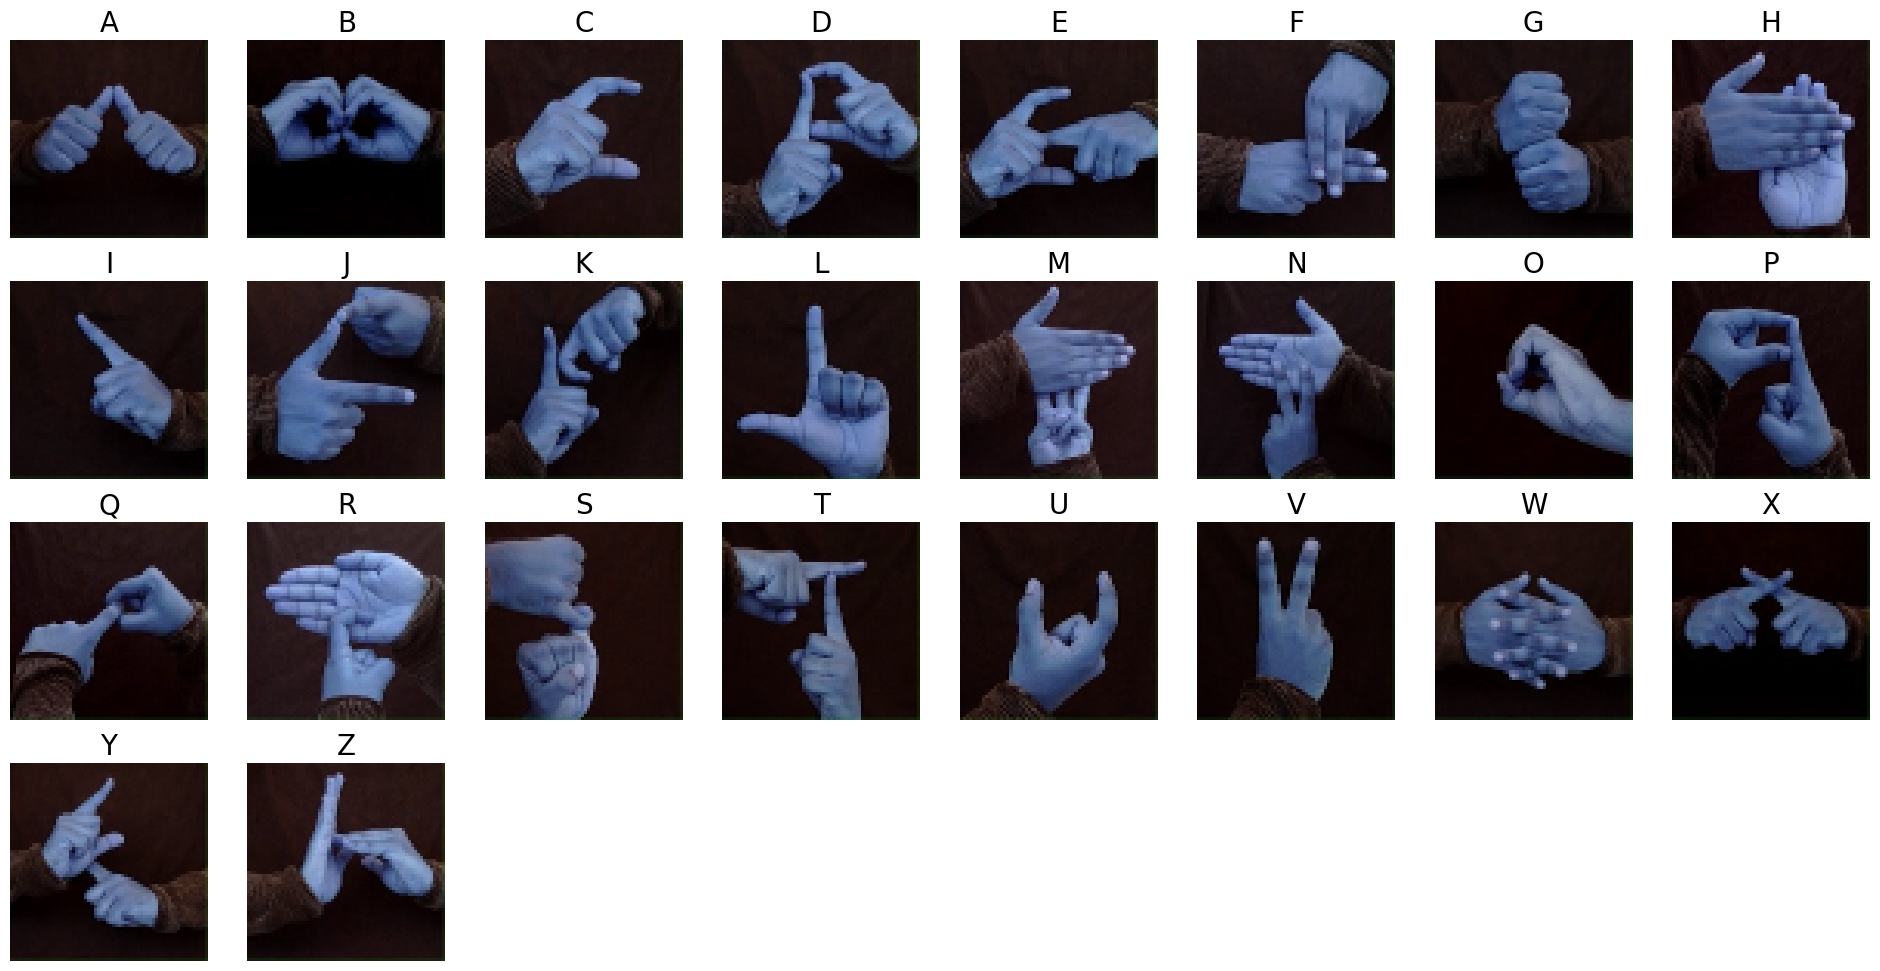

In [9]:
y_train_in = y_train.argsort()
y_train = y_train[y_train_in]
X_train = X_train[y_train_in]

print("Training Images: ")
print_images(image_list = X_train)

Testing images: 


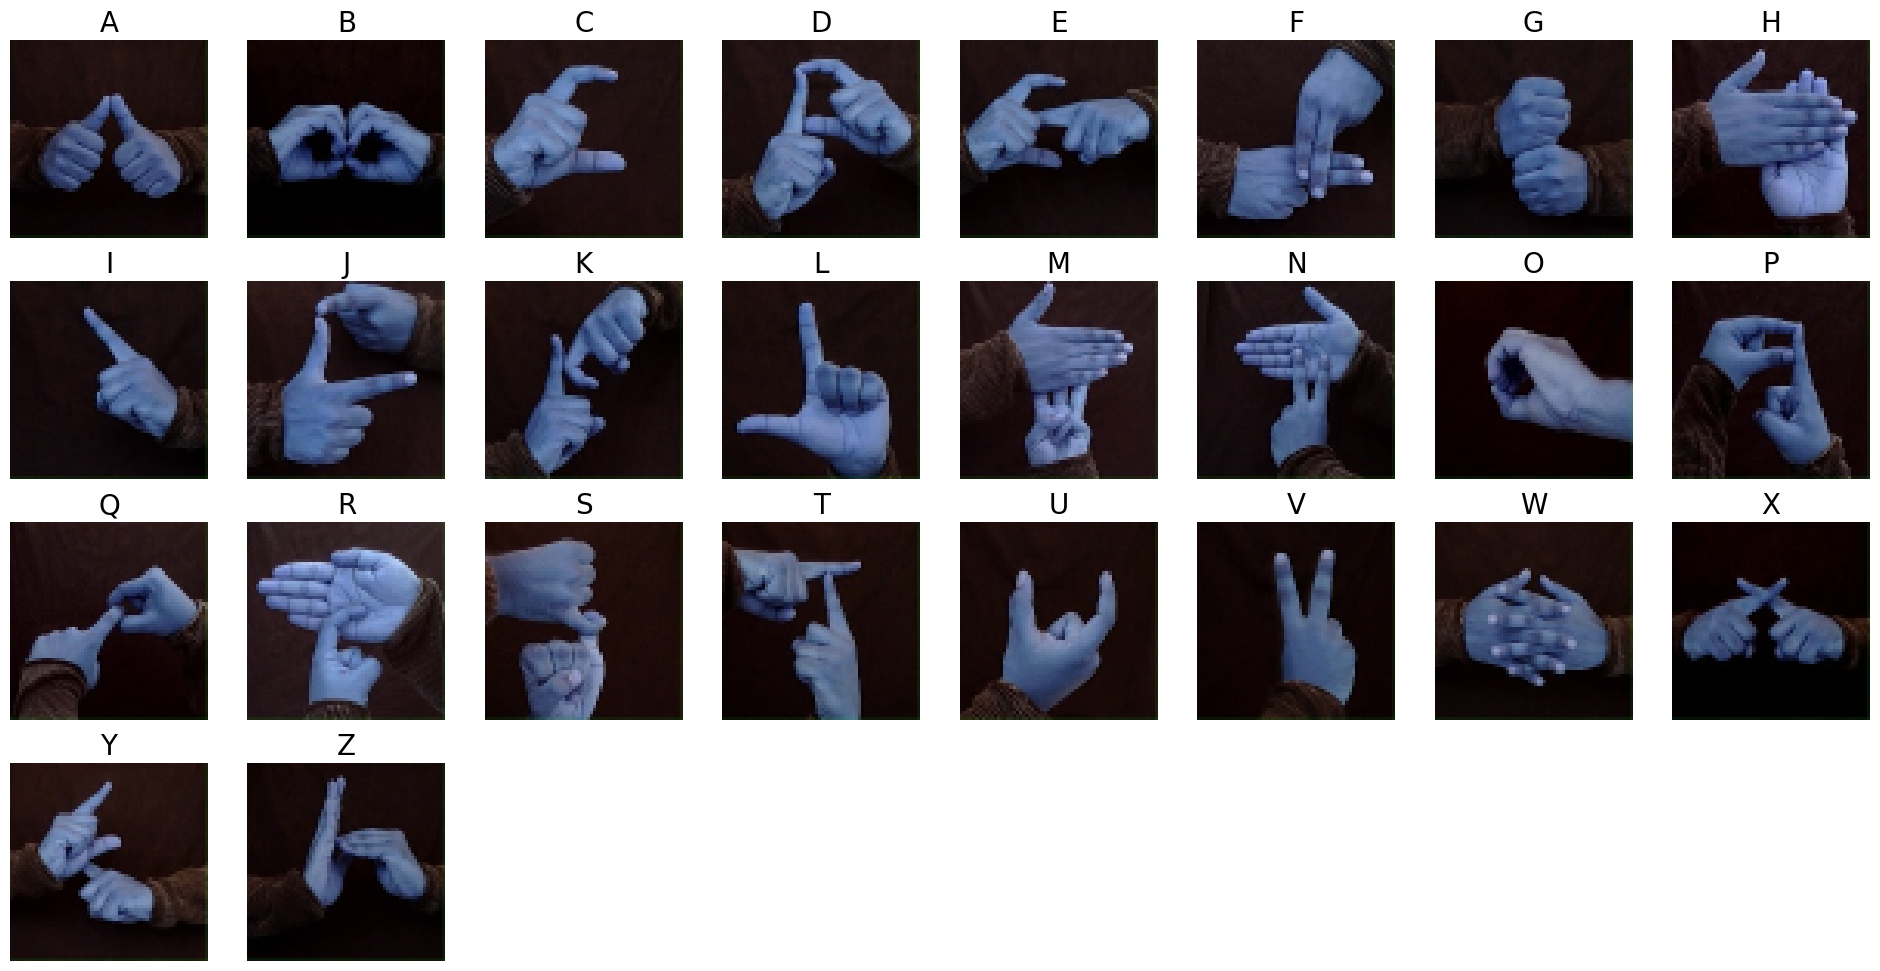

In [10]:
y_test_in = y_test.argsort()
y_test = y_test[y_test_in]
X_test = X_test[y_test_in]

print("Testing images: ")
print_images(image_list = X_test)

In [ ]:
print("Evaluation images: ")
print_images(image_list = X_eval)



# 4. Preprocessing: One-hot enconding the data


In [11]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)
y_eval = keras.utils.to_categorical(y_eval)

In [12]:
print(y_train[0])
print(len(y_train[0]))

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
26



# 5. Preprocessing - Normalize RGB values

In [13]:
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0
X_eval = X_eval.astype('float32')/255.0


# 6. Define and run the model


In [14]:
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Conv2D, Dense, Dropout, Flatten
from keras.layers import Flatten, Dense
from keras.models import Sequential

model = Sequential()
model.add(Conv2D(filters=64, kernel_size=5, padding='same', activation='relu', input_shape=(64, 64, 3), kernel_regularizer='l2'))
model.add(Conv2D(filters=64, kernel_size=5, padding='same', activation='relu', kernel_regularizer='l2'))
model.add(MaxPooling2D(pool_size=(4, 4)))
model.add(Dropout(0.5))

model.add(Conv2D(filters=128, kernel_size=5, padding='same', activation='relu', kernel_regularizer='l2'))
model.add(Conv2D(filters=128, kernel_size=5, padding='same', activation='relu', kernel_regularizer='l2'))
model.add(MaxPooling2D(pool_size=(4, 4)))
model.add(Dropout(0.5))

model.add(Conv2D(filters=256, kernel_size=5, padding='same', activation='relu', kernel_regularizer='l2'))
model.add(Dropout(0.5))
model.add(Flatten())

model.add(Dense(26, activation='softmax'))

model.summary()

# original model
# model = Sequential()
# model.add(Conv2D(filters = 64, kernel_size = (5,5), padding = 'same', activation = 'relu', 
#                  input_shape = (64, 64, 3)))
# model.add(Conv2D(filters = 64, kernel_size = (5,5), padding = 'same', activation = 'relu'))
# model.add(MaxPooling2D(pool_size = (4, 4)))
# model.add(Dropout(0.5))

# model.add(Conv2D(filters = 128 , kernel_size = (5,5), padding = 'same', activation = 'relu'))
# model.add(Conv2D(filters = 128 , kernel_size = (5,5), padding = 'same', activation = 'relu'))
# model.add(MaxPooling2D(pool_size = (4, 4)))
# model.add(Dropout(0.5))

# model.add(Conv2D(filters = 256 , kernel_size = (5,5), padding = 'same', activation = 'relu'))
# model.add(Dropout(0.5))
# model.add(Flatten())

# model.add(Dense(26, activation='softmax'))
# model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        4864      
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        102464    
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 16, 16, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       204928    
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 128)       409728    
                                                        

In [15]:
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [16]:
# Create a KFold object
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

In [17]:
# Initialize a list to store fold scores
fold_scores = []

In [18]:
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
callbacks = [ ReduceLROnPlateau(monitor='loss', patience=2, cooldown=0),
              EarlyStopping(monitor='acc', min_delta=1e-4, patience=2)]

# use for our new.h model
# from keras.callbacks import ReduceLROnPlateau, EarlyStopping
# callbacks = [ReduceLROnPlateau(monitor='val_loss', patience=2, cooldown=0),
#              EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=5)]

<!-- FOR CONFUSION MATRX -->

In [51]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Define the number of classes
num_classes = 26  # Assuming you have 26 classes for the ASL alphabet

# Initialize an empty confusion matrix
overall_cm = np.zeros((num_classes, num_classes))

In [19]:
# Iterate over the k folds
for fold_num, (train_index, val_index) in enumerate(kf.split(X_train)):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

In [20]:
# Add these print statements to debug the K-Fold loop
print(f"Processing Fold {fold_num+1}")
print(f"Train set shape: {X_train_fold.shape}, Validation set shape: {X_val_fold.shape}")

Processing Fold 10
Train set shape: (21060, 64, 64, 3), Validation set shape: (2340, 64, 64, 3)


In [21]:
# Inside the K-Fold loop
print(f"Processing Fold {fold_num+1}")
print("Train Indices:", train_index)
print("Validation Indices:", val_index)


Processing Fold 10
Train Indices: [    0     1     2 ... 23395 23396 23398]
Validation Indices: [    9    11    13 ... 23383 23397 23399]


In [22]:
# Train your model on the current fold
history = model.fit(X_train_fold, y_train_fold, epochs=10, batch_size=128, callbacks=callbacks, verbose=1)
# to get validation accyracy use
# During model training, include the validation data for tracking "val_accuracy"
history = model.fit(X_train_fold, y_train_fold, epochs=10, batch_size=128, callbacks=callbacks, verbose=1, validation_data=(X_val_fold, y_val_fold))


Epoch 1/10
165/165 [==============================] - 800s 5s/step - loss: 1.7716 - accuracy: 0.6967 - lr: 0.0010
Epoch 2/10
165/165 [==============================] - 755s 5s/step - loss: 0.3217 - accuracy: 0.9740 - lr: 0.0010
Epoch 3/10
165/165 [==============================] - 800s 5s/step - loss: 0.2242 - accuracy: 0.9828 - lr: 0.0010
Epoch 4/10
165/165 [==============================] - 973s 6s/step - loss: 0.1736 - accuracy: 0.9855 - lr: 0.0010
Epoch 5/10
165/165 [==============================] - 884s 5s/step - loss: 0.1542 - accuracy: 0.9873 - lr: 0.0010
Epoch 6/10
165/165 [==============================] - 842s 5s/step - loss: 0.1353 - accuracy: 0.9901 - lr: 0.0010
Epoch 7/10
165/165 [==============================] - 851s 5s/step - loss: 0.1290 - accuracy: 0.9906 - lr: 0.0010
Epoch 8/10
165/165 [==============================] - 851s 5s/step - loss: 0.1193 - accuracy: 0.9917 - lr: 0.0010
Epoch 9/10
165/165 [==============================] - 804s 5s/step - loss: 0.1110 - accu

In [ ]:
# Evaluate your model on the validation fold
fold_score = model.evaluate(X_val_fold, y_val_fold, verbose=0)
# fold_scores = np.concatenate((fold_scores, fold_score), axis=0)
fold_scores = np.concatenate(fold_scores)

In [ ]:
import numpy as np

# Assuming fold_scores is a 1-dimensional NumPy array where each element is accuracy
# Calculate mean accuracy and standard deviation
mean_accuracy = np.mean(fold_scores)  # Calculate mean accuracy
std_accuracy = np.std(fold_scores)    # Calculate standard deviation

print("Mean Accuracy:", mean_accuracy)
print("Standard Deviation of Accuracy:", std_accuracy)


In [ ]:
# hist = model.fit(X_train, y_train, epochs = 5, batch_size = 128,callbacks=callbacks)
hist = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test), callbacks=callbacks)


# 7. Test the model


In [ ]:
# After training your model and getting the 'hist' object, print its contents
print(hist.history)


# 8. saving the model


In [27]:
model.save('Mykfold10epochs.h5')

C:\Users\ZAID B\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [28]:
score = model.evaluate(x = X_test, y = y_test, verbose = 2)
print('Accuracy for test images:', round(score[1]*100, 3), '%')

score = model.evaluate(x = X_eval, y = y_eval, verbose = 0)
print('Accuracy for evaluation images:', round(score[1]*100, 3), '%')

score = model.evaluate(x = X_val_fold, y = y_val_fold, verbose=0)
print('Accuracy for test images:', round(score[1]*100, 3), '%')

244/244 - 73s - loss: 0.0968 - accuracy: 0.9991 - 73s/epoch - 300ms/step
Accuracy for test images: 99.91 %
Accuracy for evaluation images: 100.0 %
Accuracy for test images: 99.957 %


# 9. Prediction Purpose


In [49]:
from sklearn.metrics import classification_report

# Make predictions on test or evaluation data
y_pred = model.predict(X_test)  # Replace X_test with X_eval for evaluation data

# Convert one-hot encoded labels back to categorical labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)  # Replace y_test with y_eval for evaluation data

# Generate the classification report
class_report = classification_report(y_true_classes, y_pred_classes)

print(class_report)


244/244 [==============================] - 75s 306ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       300
           1       1.00      1.00      1.00       300
           2       1.00      1.00      1.00       300
           3       1.00      1.00      1.00       300
           4       1.00      1.00      1.00       300
           5       1.00      1.00      1.00       300
           6       1.00      1.00      1.00       300
           7       1.00      1.00      1.00       300
           8       1.00      1.00      1.00       300
           9       1.00      1.00      1.00       300
          10       1.00      1.00      1.00       300
          11       1.00      1.00      1.00       300
          12       0.99      1.00      1.00       300
          13       1.00      1.00      1.00       300
          14       1.00      1.00      1.00       300
          15       1.00      1.00      1.00       300
          16       1.00

KeyError: 'val_accuracy'

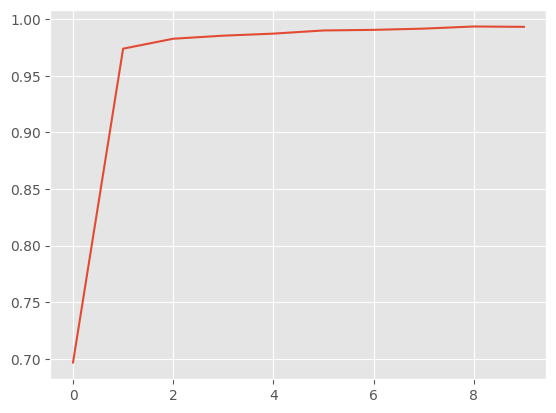

In [48]:
# import matplotlib.pyplot as plt

# # Set the ggplot style
# plt.style.use("ggplot")

# # Create a figure
# plt.figure()

# # Replace `hist` with `history`
# N = len(history.history["accuracy"])  # Use the length of your accuracy history

# # Plot validation accuracy and testing accuracy
# plt.plot(np.arange(0, N), history.history["accuracy"], label="Validation Accuracy")
# plt.plot(np.arange(0, N), history.history["testing_accuracy"], label="Testing Accuracy")  # Replace with your actual testing accuracy metric

# plt.title("Validation and Testing Accuracy")
# plt.xlabel("Epoch #")
# plt.ylabel("Accuracy")
# plt.legend(loc="lower left")
# plt.show()
import matplotlib.pyplot as plt

# Set the ggplot style
plt.style.use("ggplot")

# Create a figure
plt.figure()

# Replace `hist` with `history`
N = len(history.history["accuracy"])  # Use the length of your accuracy history

# Plot training accuracy and validation accuracy
plt.plot(np.arange(0, N), history.history["accuracy"], label="Training Accuracy")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label="Validation Accuracy")

plt.title("Training vs Validation Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.show()





# 8. Confusion Matrices

In [59]:
 # Evaluate your model on the validation fold
y_val_pred = model.predict(X_val_fold)
y_val_true = np.argmax(y_val_fold, axis=1)
y_val_pred = np.argmax(y_val_pred, axis=1)

    # Calculate the confusion matrix for this fold
cm = confusion_matrix(y_val_true, y_val_pred, labels=range(num_classes))
    
    # Add the confusion matrix of this fold to the overall confusion matrix
overall_cm += cm

# Print the overall confusion matrix


# Print the confusion matrix for this fold
print(f"Confusion Matrix - Fold {fold_num + 1}:")
print(cm)

74/74 [==============================] - 20s 272ms/step
Confusion Matrix - Fold 10:
[[ 88   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0  86   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0  91   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0  90   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   0  89   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  96   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  93   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 100   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  86   0   

In [61]:
#Helper function to plot confusion matrix
def plot_confusion_matrix(y, y_pred):
    y = np.argmax(y, axis = 1)
    y_pred = np.argmax(y_pred, axis = 1)
    cm = confusion_matrix(y, y_pred)
    plt.figure(figsize = (24, 20))
    ax = plt.subplot()
    plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Purples)
    plt.colorbar()
    plt.title("Confusion Matrix")
    tick_marks = np.arange(len(uniq_labels))
    plt.xticks(tick_marks, uniq_labels, rotation=45)
    plt.yticks(tick_marks, uniq_labels)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    ax.title.set_fontsize(20)
    ax.xaxis.label.set_fontsize(16)
    ax.yaxis.label.set_fontsize(16)
    limit = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment = "center",color = "white" if cm[i, j] > limit else "black")
    plt.show()

## 8.1 Confusion Matrix for Test Set

In [ ]:
# from sklearn.metrics import confusion_matrix
# import itertools

# y_test_pred = model.predict(X_test, batch_size = 128, verbose = 0)
# plot_confusion_matrix(y_test, y_test_pred)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Calculate the confusion matrix for the test set
y_test_true = np.argmax(y_test, axis=1)
y_test_pred = model.predict(X_test, batch_size=128, verbose=0)
y_test_pred = np.argmax(y_test_pred, axis=1)

confusion_mat = confusion_matrix(y_test_true, y_test_pred, labels=range(num_classes))

# Plot the confusion matrix
plt.figure(figsize=(12, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=range(num_classes))
disp.plot(cmap='viridis', values_format='d')
plt.title("Confusion Matrix")
plt.show()


## 8.2 Confusion Matrix for Evaluation Set

In [ ]:
y_eval_pred = model.predict(X_eval, batch_size = 128, verbose = 0)
plot_confusion_matrix(y_eval, y_eval_pred)

# 9. Prediction

1/1 [==============================] - 0s 119ms/step


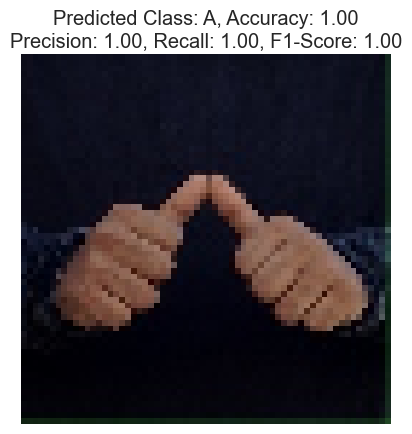

Predicted Class Index: 0
Predicted Class Label: A
Class Probabilities: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-Score: 1.00


In [60]:
from keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load your trained model (replace 'model_path' with the path to your model)
model_path = 'Mykfold10epochs.h5'
model = load_model(model_path)

# Load and preprocess the image as shown in the previous response
image_path = 'E:\\ygesh_isl\\ASL-Recognition-CNN-OpenCV\\TEST\\A\\1.jpg'
img = image.load_img(image_path, target_size=(64, 64))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

# Make predictions on the image
predictions = model.predict(x)

# Get the predicted class index (assuming your model uses softmax activation)
predicted_class_index = np.argmax(predictions[0])

# Define class names (replace with your class names)
class_names = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z"]

# Get the true class label of the image
true_class_label = "A"  # Replace with the true class label of the image

# Calculate the model's accuracy on the prediction
true_label_index = class_names.index(true_class_label)
accuracy = (predicted_class_index == true_label_index)

# Calculate precision, recall, and F1-score
true_labels = [true_label_index]
predicted_labels = [predicted_class_index]
precision = precision_score(true_labels, predicted_labels, average='macro')
recall = recall_score(true_labels, predicted_labels, average='macro')
f1 = f1_score(true_labels, predicted_labels, average='macro')

# Display the image
plt.imshow(img)
plt.axis('off')

# Display the predicted class, accuracy, and other information
plt.title(f'Predicted Class: {class_names[predicted_class_index]}, Accuracy: {accuracy:.2f}\n'
          f'Precision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1:.2f}')
plt.show()

# You can also print the class index and probabilities
print(f'Predicted Class Index: {predicted_class_index}')
print(f'Predicted Class Label: {class_names[predicted_class_index]}')
print(f'Class Probabilities: {predictions[0]}')
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')
